## About
This program calculates the correlation coefficients between the benchmark (S&P 500) and various instruments.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Set the ticker symbols

In [2]:
benchmark = '^GSPC'
tickers = ['^GSPC', '^IXIC', '^TNX', '^VIX', '^GDAXI', '^N225', '^JKSE',
           'ARKK', 'ARKG', 'ARKF', 'ARKW', 'ETH-USD', 'BTC-USD']

## Download the historical data

#### Set start date and end date

In [3]:
start_date = datetime.now() - relativedelta(years=3)
start_date = start_date.strftime('%Y-%m-%d')
end_date = str(datetime.now().strftime('%Y-%m-%d'))

#### Fetch data from Yahoo Finance

In [4]:
df = yf.download(tickers, start=start_date, end=end_date)['Close']
df.dropna(inplace=True)

[*********************100%***********************]  13 of 13 completed


#### Plot the source data

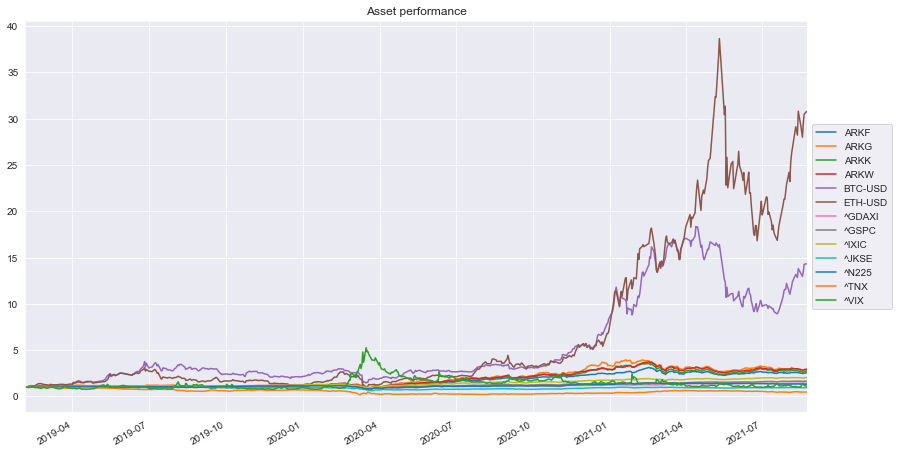

In [5]:
ax = (df/df.iloc[0]).plot(figsize=(14,8),title='Asset performance')
ax.set_xlim(start_date, end_date)
ax.autoscale(tight=True, axis='x')
ax.set(xlabel='')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## Calculate correlation

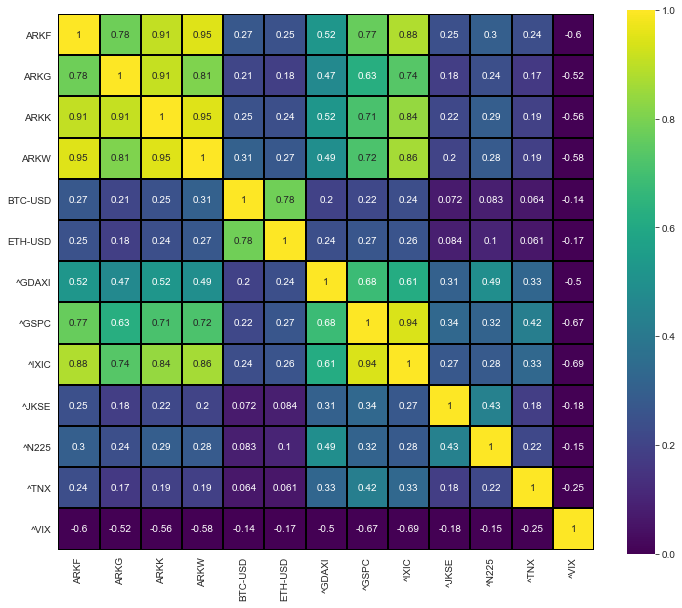

In [6]:
pct_change = df.pct_change().dropna()
corr_mat = pct_change.corr()

# create heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, cmap='viridis',annot=True, vmin=0, vmax=1, 
            center= 0.5, linewidths=1, linecolor='black', square=True);

## Optional: Sort correlation coefficients of the benchmark index

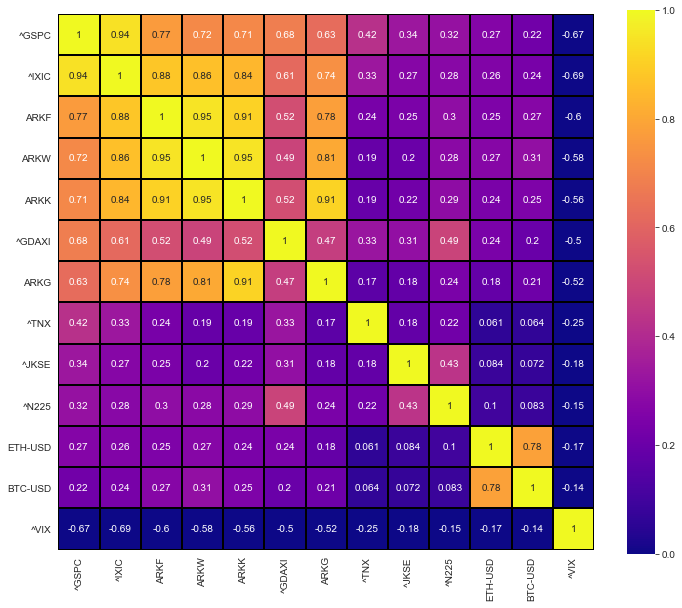

In [7]:
sorted_idx = corr_mat[benchmark].sort_values(ascending=False).index
df2 = df[sorted_idx].copy()
pct_change = df2.pct_change().dropna()
corr_mat = pct_change.corr()

# create heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, cmap='plasma',annot=True, vmin=0, vmax=1, 
            center= 0.5, linewidths=1, linecolor='black', square=True);

## Optional: Plot the changes of correlation coefficients over time

In [8]:
window = 100

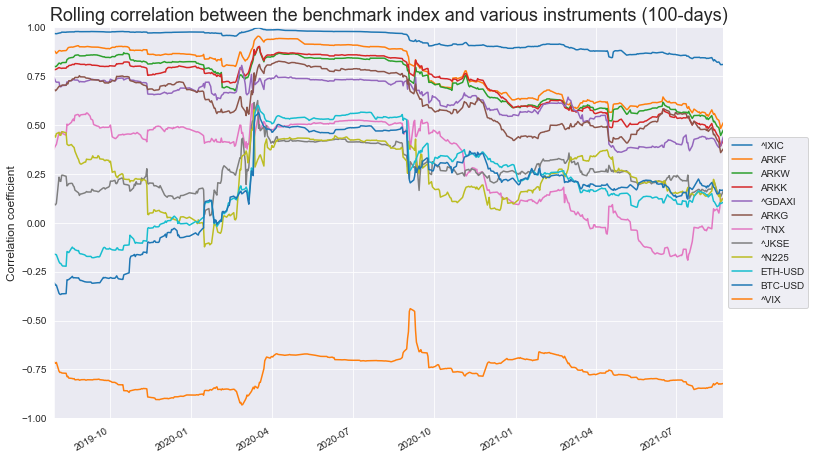

In [9]:
plt.figure(figsize=(12, 8))
for t in sorted_idx[1:]:
    pct_change[t].rolling(window=window).corr(pct_change[benchmark]).plot(label=t, legend=True)
plt.title(f'Rolling correlation between the benchmark index and various instruments ({window}-days)', fontsize=18)
plt.xlabel('');
plt.ylabel('Correlation coefficient',fontsize=12)
plt.ylim([-1, 1])
plt.legend(sorted_idx[1:])
plt.autoscale(tight=True, axis='x')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Optinal: Using clustermap

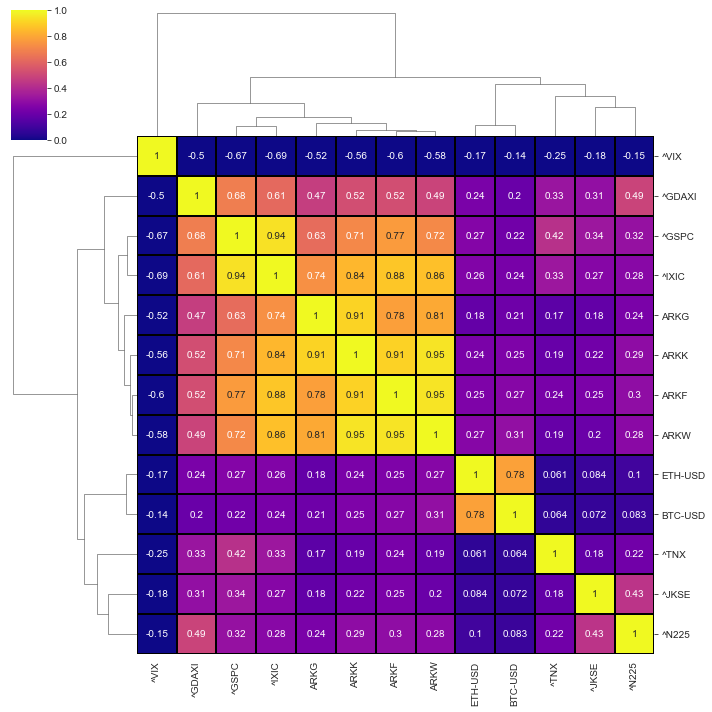

In [10]:
sns.clustermap(corr_mat,cmap='plasma',annot=True, vmin=0, vmax=1, 
            center= 0.5, linewidths=1, linecolor='black', square=True);